In [10]:
import pandas as pd
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash  # (version 1.12.0) pip install dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from IPython.display import Image

In [3]:
app = dash.Dash(__name__)

In [4]:
df = pd.read_csv("/Users/paxton615/pycharm/dash_project/intro_bees.csv")

df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.reset_index(inplace=True)
print(df[:5])

     State  ANSI Affected by  Year state_code  Pct of Colonies Impacted
0  Alabama     1     Disease  2015         AL                      0.05
1  Alabama     1     Disease  2016         AL                      1.20
2  Alabama     1     Disease  2017         AL                      2.25
3  Alabama     1     Disease  2018         AL                      1.30
4  Alabama     1     Disease  2019         AL                      1.80


In [5]:
df['Affected by'].unique() #病因

array(['Disease', 'Other', 'Pesticides', 'Pests_excl_Varroa', 'Unknown',
       'Varroa_mites'], dtype=object)

教学视频：https://www.youtube.com/watch?v=hSPmj7mK6ng

视频没有阐述数据与这个dashboard之间的对应关系。

In [6]:
app.layout = html.Div([
    
    html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),

    # 创建一个下拉框
    dcc.Dropdown(id="slct_year",                   # 注意下拉框与Input之间的对应关系
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017},
                     {"label": "2018", "value": 2018}],
                 multi=False,
                 value=2015,                      # 初始默认数值，也是下方option_slctd的初始值,注意关联关系
                 style={'width': "40%"}
                 ),         

    html.Div(id='output_container', children=[]),   # children可以不在这里出现,但注意它与下方Output的对应关系
    
    html.Br(),                                    # 空格

    dcc.Graph(id='my_bee_map', figure={})         # figure可以不在这里出现,但注意它与下方Output的对应关系

])

In [7]:
# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components

# 逻辑上这是一个自下而上，从Input到Output的过程，slct_year和vale，进而改动图形，改动数据
# 注：如果只有一个Output，则不使用[]括号
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)

# -----------------------------------------------------------------------------

# 上layout，中callback，下function之间的关联关系梳理:

# layout中的value 与 callback中的 Input关联， Input又与function一一对应，因此option_slctd的初始
# 默认值，其实就是layout中的 value = 2015

# ------------------------------------------------------------------------------

# 每一个callback都要用一个function来赋予功能，一一对应关系 

def update_graph(option_slctd): # 一个Input对应function中的一个argument，比如上面的value就对应这里的option_slctd 
    print(option_slctd)
    print(type(option_slctd))

    container = "The year chosen by user was: {}".format(option_slctd)
    
    # code到这里，对应着return container, fig 中 返回container的部分，下面还需要返回fig（figure）
# -------------------------------------------------------------------------------
   # code到这里，将返回fig（figure）的部分，也是Plotly Graphs的部分

    dff = df.copy()                                  # 最好不要用原df来加工数据，用copy
    dff = dff[dff["Year"] == option_slctd]           # 年份选择，默认值是 value = 2015
    dff = dff[dff["Affected by"] == "Varroa_mites"]  # 年份选择后，在筛选病因

    # Plotly Express
    fig = px.choropleth(
        data_frame=dff,
        locationmode='USA-states',
        locations='state_code',
        scope="usa",
        color='Pct of Colonies Impacted',
        hover_data=['State', 'Pct of Colonies Impacted'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
        template='plotly_dark'
    )
    
# ------------------------------------------------------------------
# https://plotly.com/python/  里面可以找到Plotly Graph 很多Examples，但plotly.express 因为其简洁,是趋势

    # Plotly Graph Objects (GO)
    # fig = go.Figure(
    #     data=[go.Choropleth(
    #         locationmode='USA-states',
    #         locations=dff['state_code'],
    #         z=dff["Pct of Colonies Impacted"].astype(float),
    #         colorscale='Reds',
    #     )]
    # )
    #
    # fig.update_layout(
    #     title_text="Bees Affected by Mites in the USA",
    #     title_xanchor="center",
    #     title_font=dict(size=24),
    #     title_x=0.5,
    #     geo=dict(scope='usa'),
    # )

    return container, fig  # return与Output一一对应，数量相同


In [13]:
if __name__ == '__main__':
    app.run_server(debug=True , use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
2015
<class 'int'>
None
<class 'NoneType'>
2018
<class 'int'>


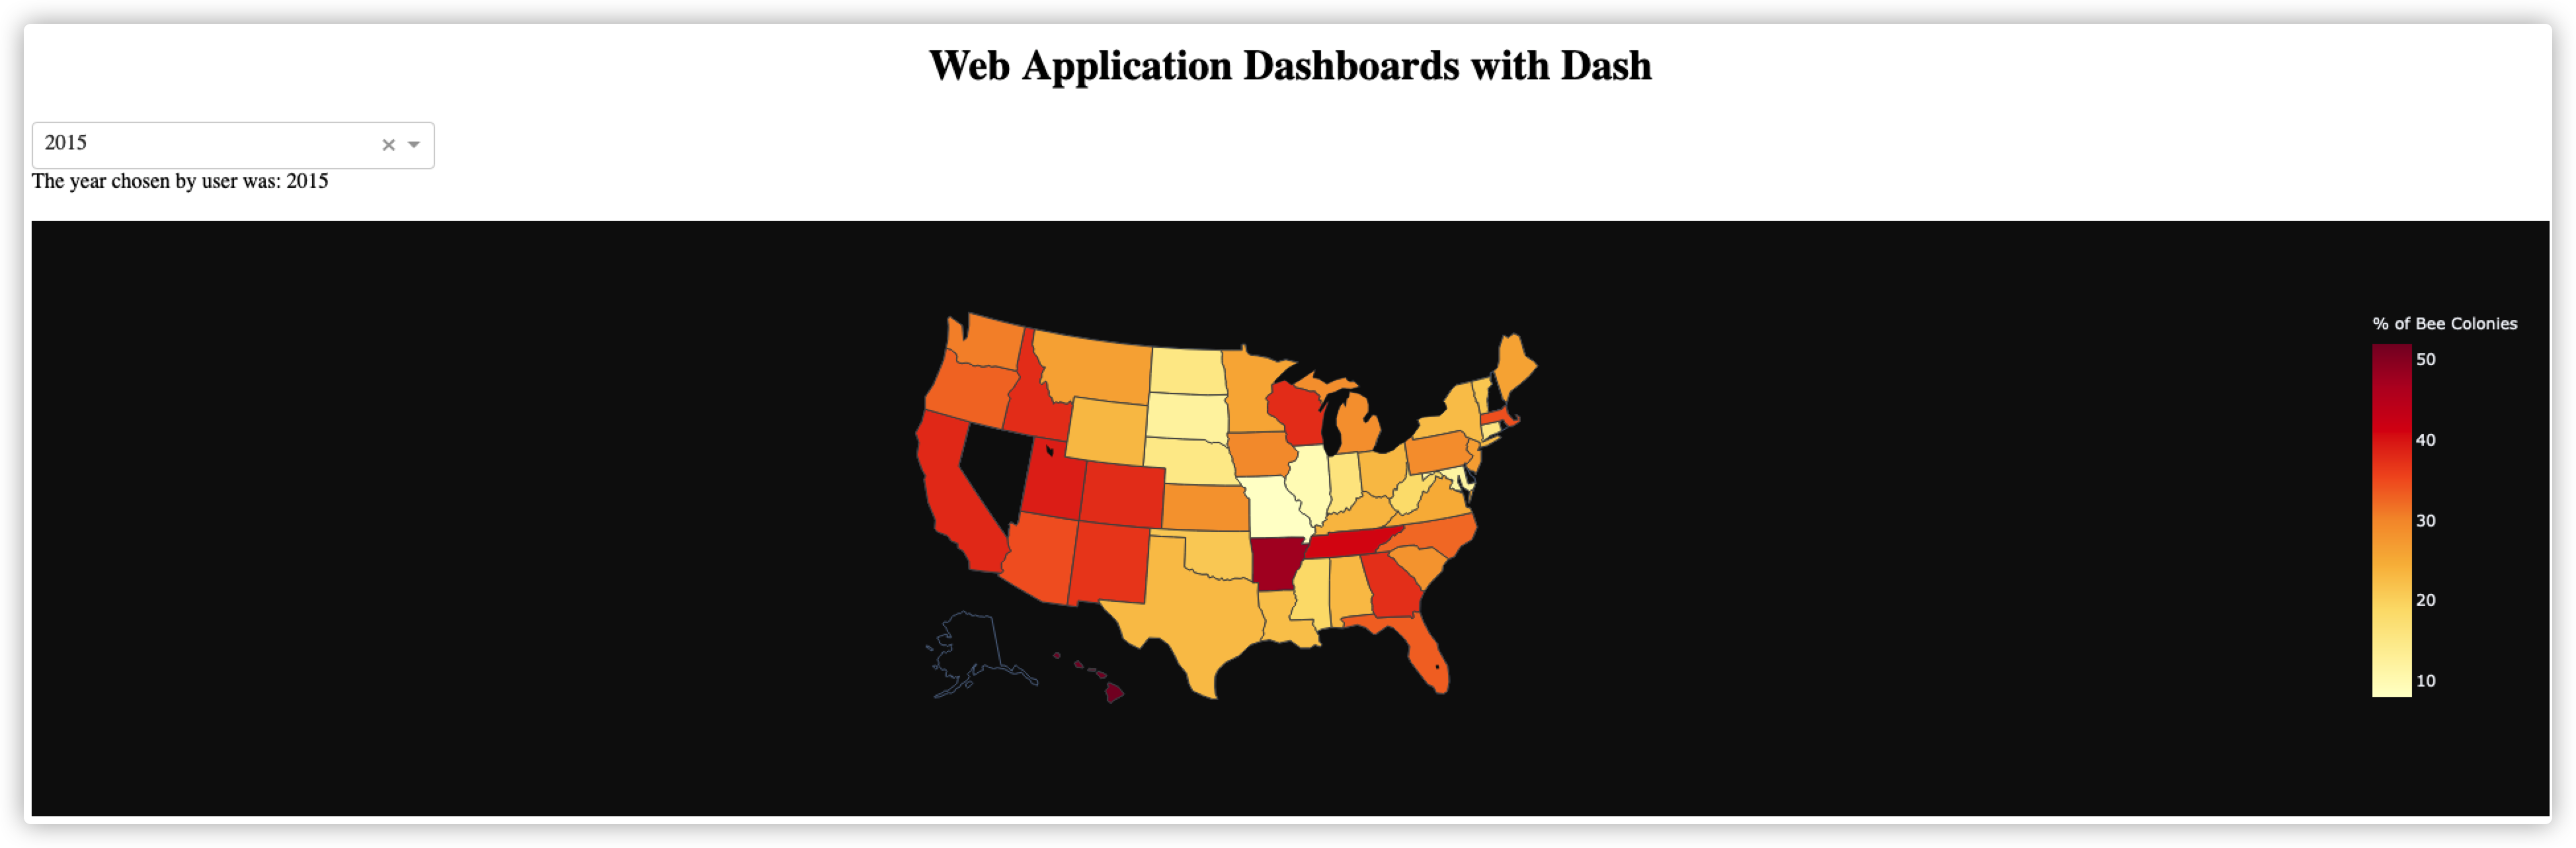

In [11]:
Image(filename='/Users/paxton615/Github_Personal/Notes/Notes/pics/Dash/'+'default2015.png')

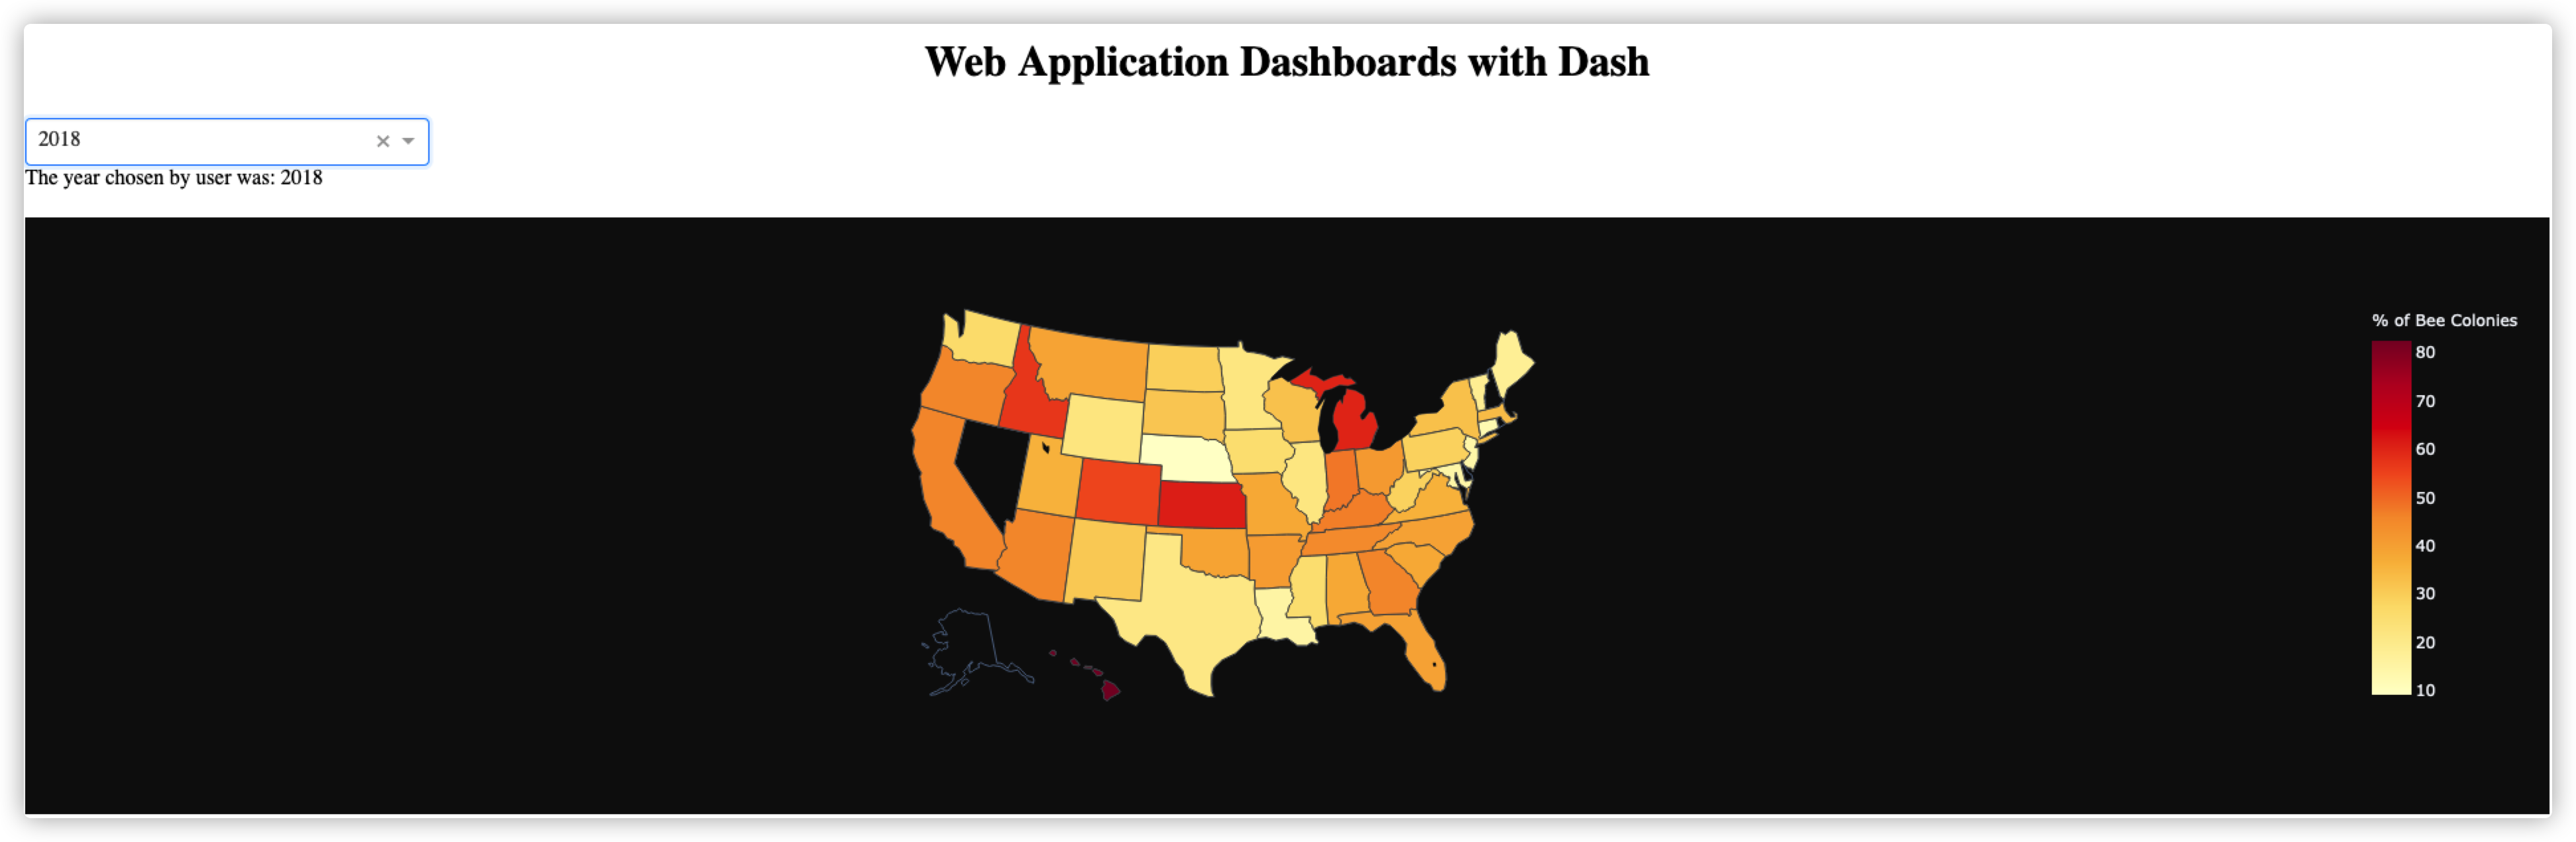

In [14]:
Image(filename='/Users/paxton615/Github_Personal/Notes/Notes/pics/Dash/'+'2018.png')

In [ ]:
# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        id='demo-dropdown',
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': 'Montreal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='NYC'
    ),
    html.Div(id='dd-output-container')
])


@app.callback(
    dash.dependencies.Output('dd-output-container', 'children'),
    [dash.dependencies.Input('demo-dropdown', 'value')])
def update_output(value):
    return 'You have selected "{}"'.format(value)


if __name__ == '__main__':
     app.run_server(debug=True, use_reloader=False)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [ ]:
app = dash.Dash()

In [ ]:
app.layout = html.Div(
    html.H1(children="Hello World")
)

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True, use_reloader=False)

In [ ]:
# deploying dash online

In [ ]:
# study is half way there

In [ ]:
# regularization in the model

In [ ]:
# making model for predicting investors

In [ ]:
# 3